<a href="https://colab.research.google.com/github/Emiliewu/datascience-assignments/blob/main/week3_d1_Boxplots_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

#Load the dataset

In [4]:
# This filepath works if you have added the Coding Dojo file structure to your Drive
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/ames-housing-cleaned-eda.csv"
df = pd.read_csv(fpath)
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
0,907227090,RL,60,7200,Pave,MISSING,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
1,527108010,RL,134,19378,Pave,MISSING,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,MISSING,320000.0,3,2006,3.0,1.0
2,534275170,RL,-1,12772,Pave,MISSING,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,MISSING,151500.0,4,2007,1.0,0.0
3,528104050,RL,114,14803,Pave,MISSING,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,MISSING,385000.0,6,2008,3.0,0.0
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,MISSING,193800.0,2,2007,3.0,0.0


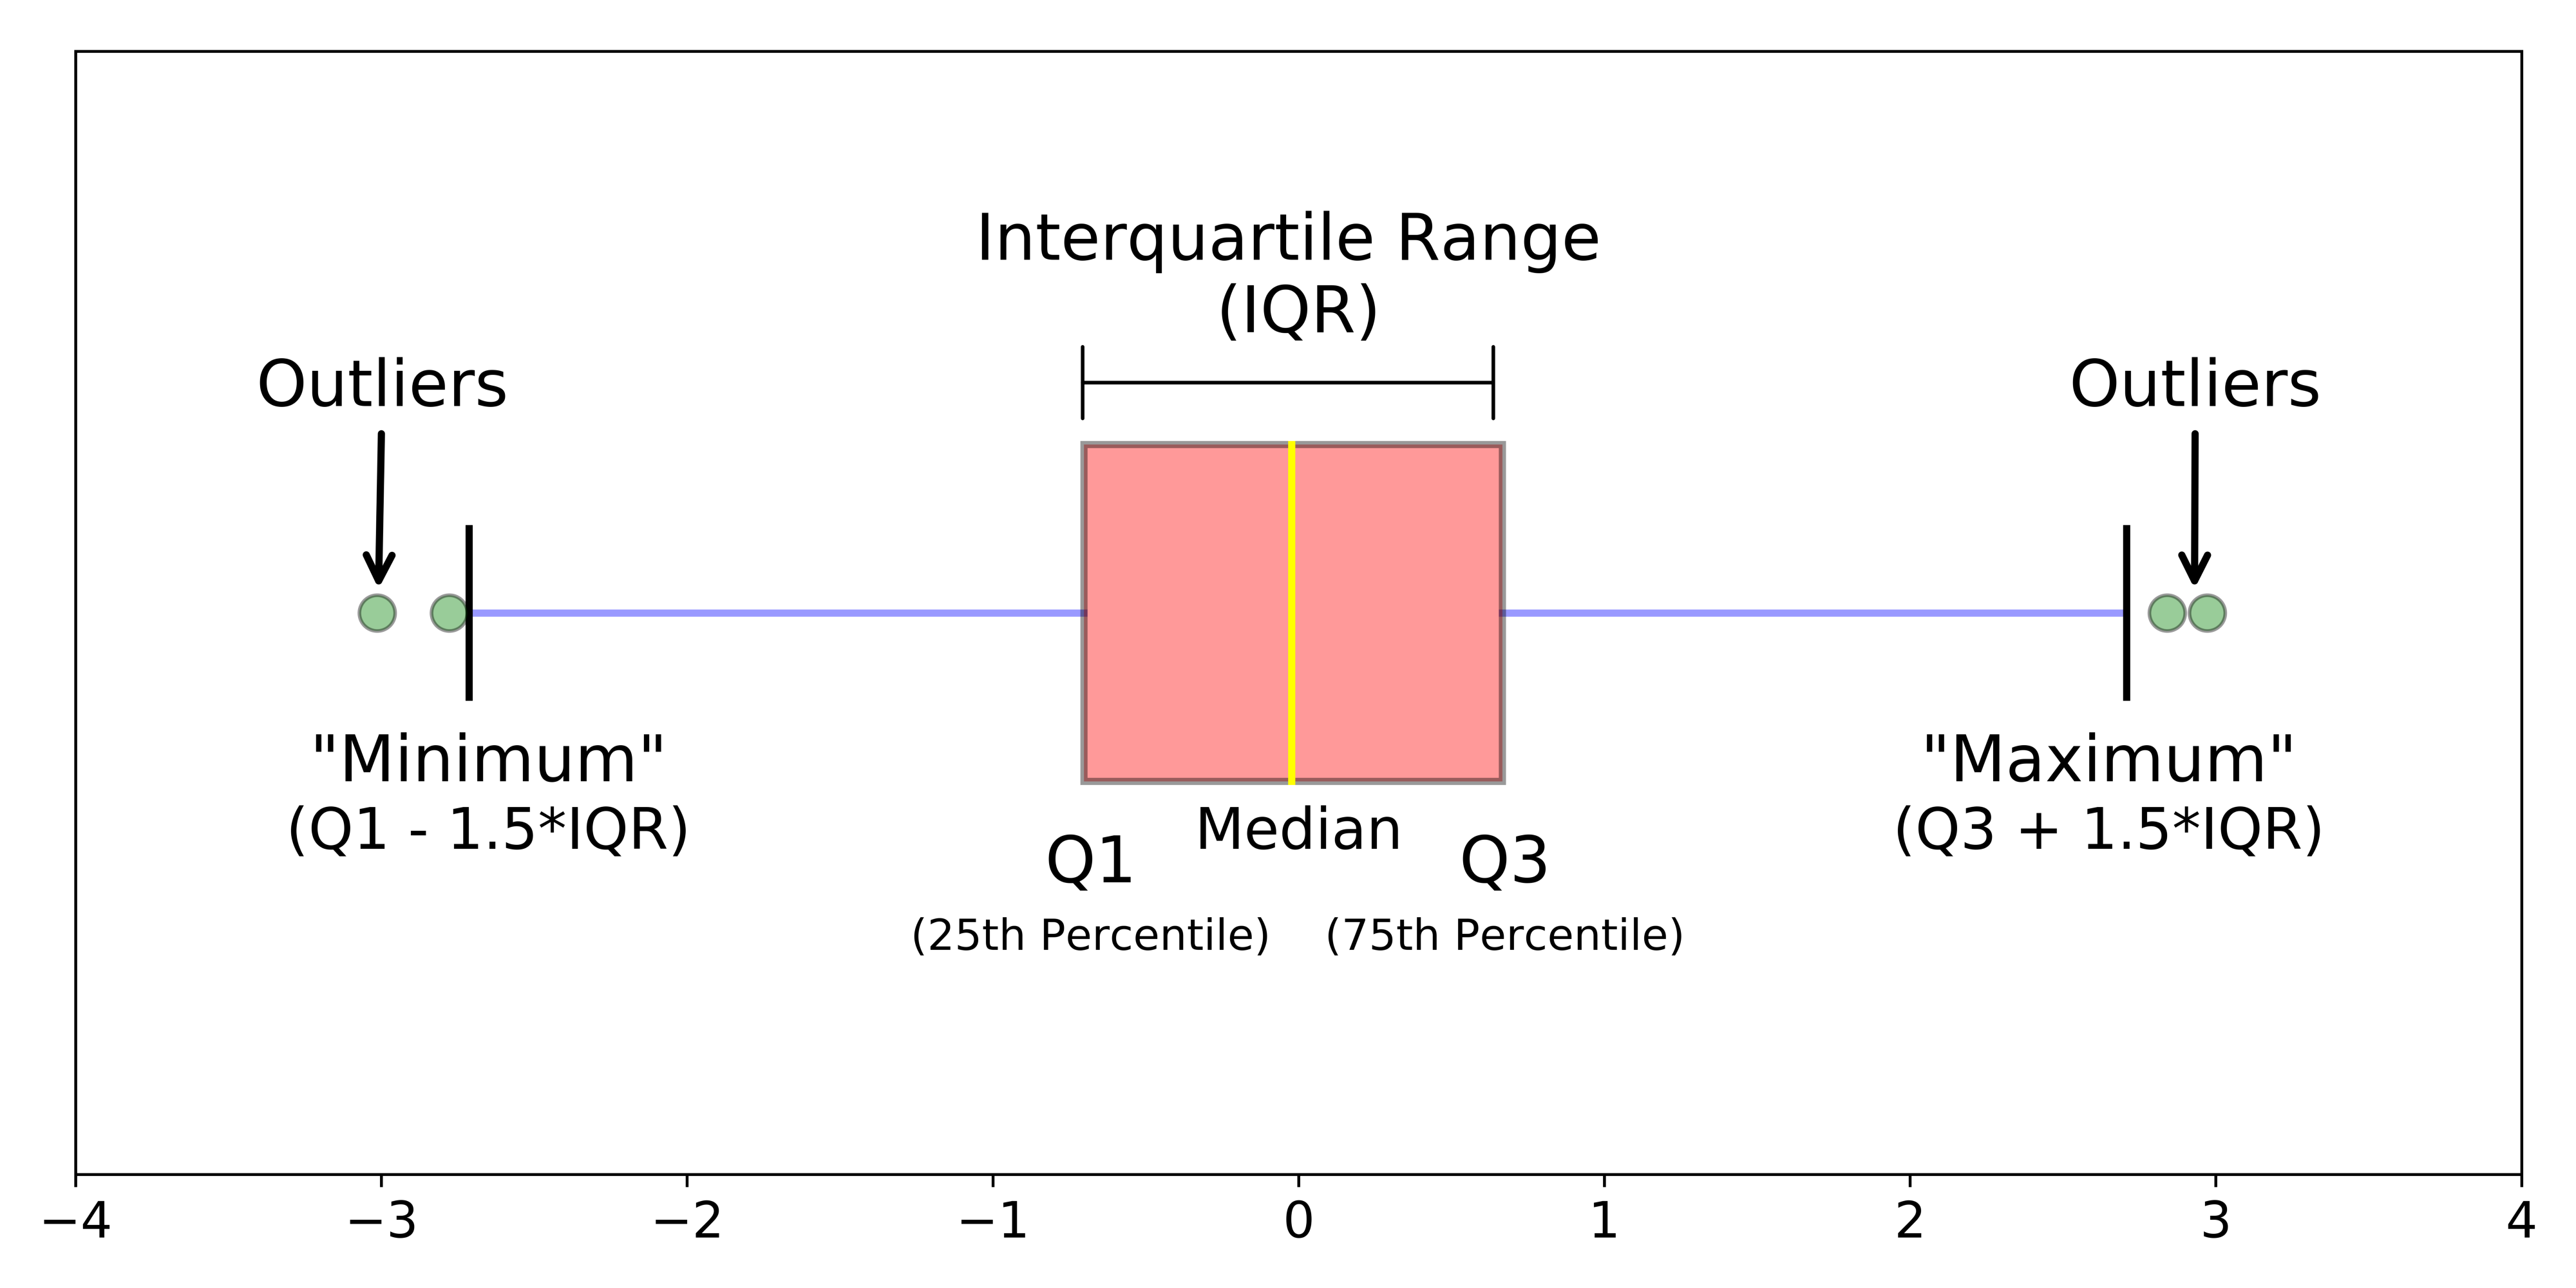
* A boxplot (also called a box and whisker plot) is a standardized way of displaying the distribution of data based on a five-number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. Outliers are values that are dramatically different than the other values. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. The parts of a boxplot are defined below:

    - median (Q2/50th Percentile): the middle value of the dataset.
    - first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
    - third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
    - interquartile range (IQR): 25th to the 75th percentile. Note that the middle 50% of the values fall within the IQR.
    - whiskers (shown in blue)
    - outliers (shown as green circles)
    - “maximum”: Q3 + 1.5*IQR
    - “minimum”: Q1 -1.5*IQR

In [5]:
# obtains summary stats for Living Area Sqft
df['Living Area Sqft'].describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Living Area Sqft, dtype: float64

You can create a boxplot using either matplotlib, pandas, or seaborn.

# Boxplots using matplotlib

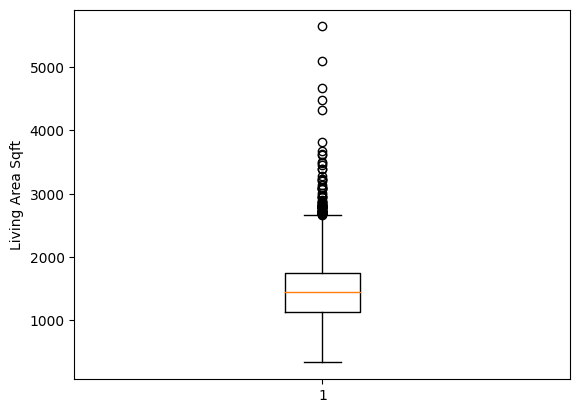

In [6]:
# create boxplot for the entire dataset
fig, ax = plt.subplots()
data = df["Living Area Sqft"]
ax.boxplot(data);
ax.set_ylabel("Living Area Sqft");

To help us relate our boxplot with the terminology in the previous image, we can produce a horizontal boxplot by including the argument vert = False

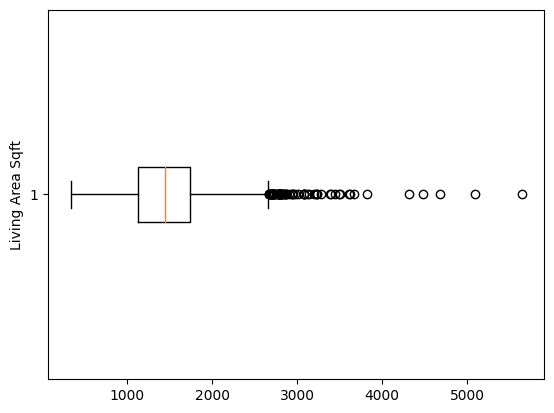

In [7]:
# making the boxplot horizontal
fig, ax = plt.subplots()
ax.boxplot(data, vert = False);
ax.set_ylabel("Living Area Sqft");

We can now compare our visual to some of the statistical values provided in .describe(). Note that the max and min values in .describe() refer to the actual highest and lowest values in the dataset and not the values associated with the ends of the long lines (whiskers) in the boxplot.

In [9]:
# Take a look at summary stats
describe_sqft = data.describe().round(2)
describe_sqft

count    2930.00
mean     1499.69
std       505.51
min       334.00
25%      1126.00
50%      1442.00
75%      1742.75
max      5642.00
Name: Living Area Sqft, dtype: float64

# Boxplots using pandas

Pandas can be used as a wrapper around Matplotlib. One reason why you might want to plot using Pandas is that it requires less code.

We are going to create a boxplot to show how much less syntax you need to create the plot with pandas vs. pure matplotlib.

When looking at the entire dataset, we see that we have some high outliers. But, knowing that this is data related to tumor measurements, we should separate the data into benign and malignant to better understand the distribution.

When using maplotlib, we must separately define the data series for each group we want to compare.

Then we create the boxplot that will allow us to compare the distribution of the malignant measurements with the distribution of the benign measurements.



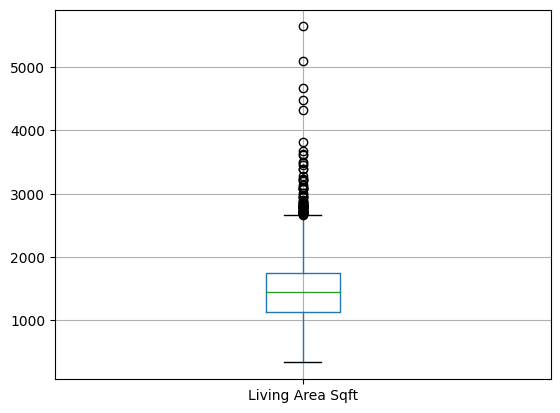

In [10]:
# Plotting with pandas
ax = df.boxplot(column = "Living Area Sqft")

An advantage of Pandas is that you can create a boxplot for multiple features at once.

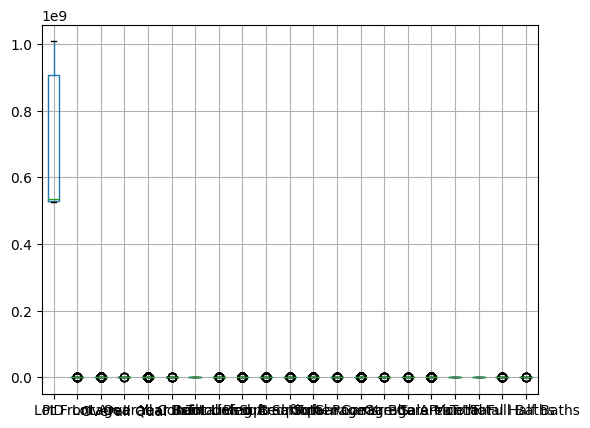

In [11]:
# Create a boxplot with each feature
ax = df.boxplot();

Notice the overlapping titles on our graph. We need to fix this for our final plot. The easiest way to do this with Pandas is to add rot=45 or rot=90. This is a convenient way to rotate the tick labels.

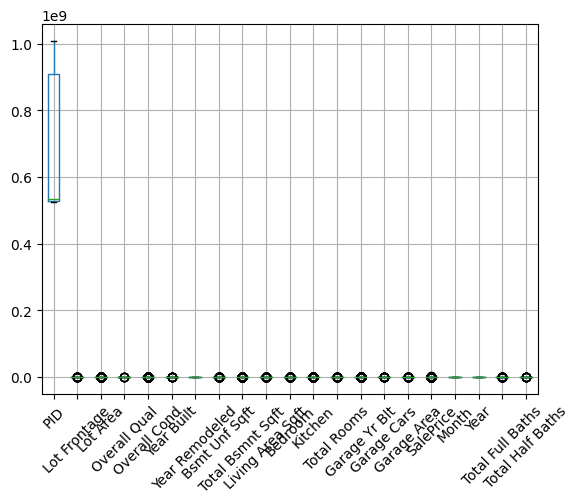

In [12]:
# Rotate teh tick labels
ax = df.boxplot(rot=45)

However, as you can see above, rotating the tick labels causes the tick labels to appear misaligned with the corresponding tick.

# Using ax.set_xticklabels to rotate and align tick labels
A better approach, that will work for any Axes object is to use ax.set_xticklabels(). This method requires that we provide the text labels as the first argument. We can grab the current xtick labels that we want to rotate by using ax.get_xticklabels().

We can then specify rotation=45 to rotate the labels. Finally, we can align end of tick labels to the tick marks by also specifying horizontalalignment='right'. (You can also use the more convenient abbreviation ha='right')

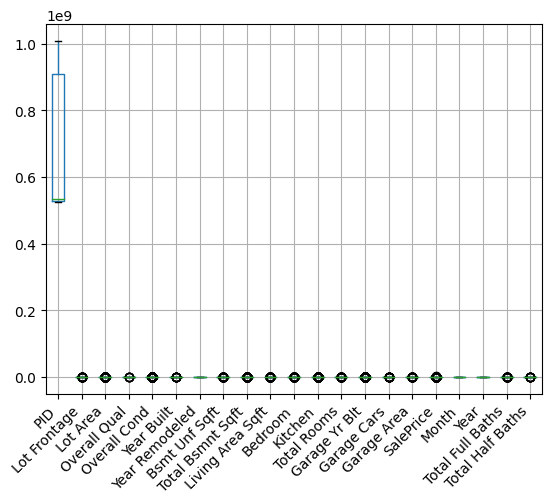

In [16]:
# Create a boxplot with all features and rotating xtick labels
ax = df.boxplot()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


As we can see above, plotting all of the features on one boxplot can make it very difficult to see any features with smaller values. Notice that we really can't see the details for any column other than "SalePrice."

# Boxplots using seaborn

We can also use seaborn's boxplot function.

Reminder: to get the best results with seaborn:
Pass in your entire dataframe as the data argument
Then pass in the column names from your dataframe as the arguments for x and y.
If we want to create a vertical boxplot, we will pass our column name as the y argument.

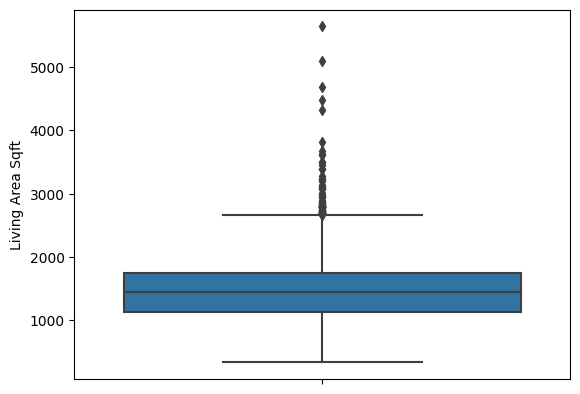

In [17]:
# Create a vertical boxplot
ax = sns.boxplot(data=df, y="Living Area Sqft")

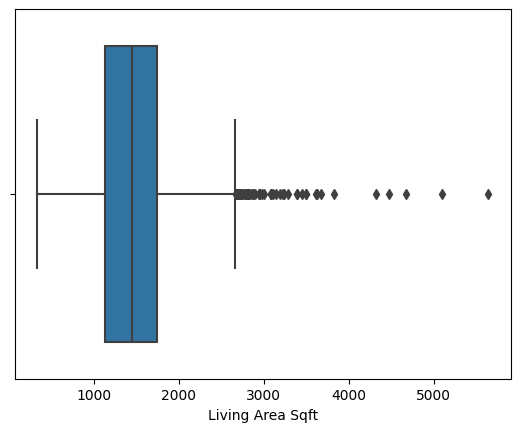

In [18]:
# Create a horizontal boxplot
ax = sns.boxplot(data=df, x="Living Area Sqft")

#Creating Barplots By Group
While we are focusing on boxplots to explore the distribution of a single feature. We can also create a boxplot with the groups from another column separated.

For example, if we wanted to compare the Living Area Sqft boxplot for homes that have central air vs. ones that do, we can add x='Central Air' to our vertical boxplot:

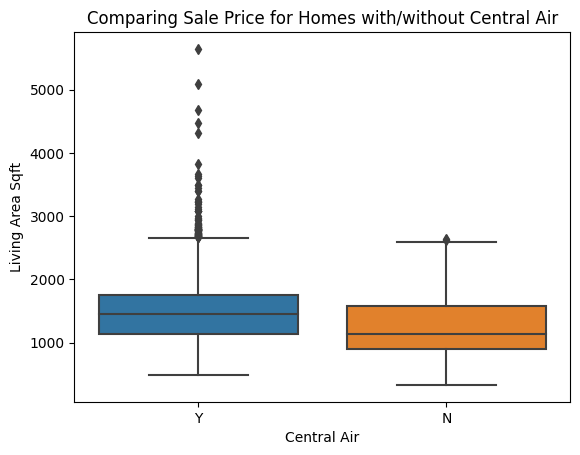

In [19]:
# Grouped boxplot in seaborn
ax = sns.boxplot(data=df, x='Central Air', y="Living Area Sqft")
ax.set_title("Comparing Sale Price for Homes with/without Central Air");

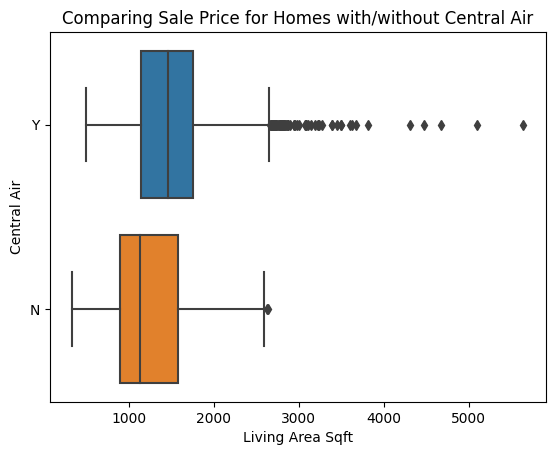

In [20]:
# Horizontal grouped boxplot in seaborn
ax = sns.boxplot(data=df, y='Central Air', x="Living Area Sqft")
ax.set_title("Comparing Sale Price for Homes with/without Central Air");